In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

# Set to display all columns
pd.set_option('display.max_columns', None)

# Set to display 50 rows 
pd.set_option('display.max_rows', 50)

# Importing the movie dataset
movie = pd.read_csv('../../data/MovieSummaries/movie.metadata.tsv', sep= '\t', header=None)

movie.columns = ['WikiID', 'FreebaseID', 'Name', 'ReleaseDate',
                     'Revenue', 'Runtime', 'Languages_tuple', 'Countries_tuples', 'Genres_tuples']
movie.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [2]:
print(movie.shape)
print(movie.dtypes)

(81741, 9)
WikiID                int64
FreebaseID           object
Name                 object
ReleaseDate          object
Revenue             float64
Runtime             float64
Languages_tuple      object
Countries_tuples     object
Genres_tuples        object
dtype: object


### Checking missing values in the movie dataset

In [3]:
print((pd.isna(movie.iloc[:,:6]).sum()) / len(movie))
print((movie.iloc[:, 6:] == '{}').sum() / len(movie))

WikiID         0.000000
FreebaseID     0.000000
Name           0.000000
ReleaseDate    0.084437
Revenue        0.897224
Runtime        0.250180
dtype: float64
Languages_tuple     0.169633
Countries_tuples    0.099754
Genres_tuples       0.028064
dtype: float64


### Data Processing

#### Parsing tuples into lists

In [4]:
import ast

def conv_to_dict(val): 
    try:
        return ast.literal_eval(val) if pd.notna(val) else {}
    except (ValueError, SyntaxError):
        return {}

def get_list(x):
    return list(x.values())

In [5]:
movie['Languages'] = movie['Languages_tuple'].apply(conv_to_dict).apply(get_list)
movie['Countries'] = movie['Countries_tuples'].apply(conv_to_dict).apply(get_list)
movie['Genres'] = movie['Genres_tuples'].apply(conv_to_dict).apply(get_list)

In [6]:
movie.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama]


#### Importing the movie summary plot dataset

In [7]:
plots = pd.read_csv('../../data/MovieSummaries/plot_summaries.txt', sep='\t', header=None)
plots.columns = ['WikiID', 'Plot']
plots.head()

,WikiID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


#### Importing the character dataset

In [34]:
characters = pd.read_csv('../../data/MovieSummaries/character.metadata.tsv', sep= '\t', header=None)
characters.columns = ['WikiMovieID', 'FreebaseMovieID', 'MovieReleaseDate','CharacterName',
                      'ActorBirthDate', 'ActorGender', 'ActorHeight','ActorEthnicity', 
                      'ActorName', 'ActorAge', 'CharacterActorMap', 'CharacterID', 'ActorID']
characters.head()

,WikiMovieID,FreebaseMovieID,MovieReleaseDate,CharacterName,ActorBirthDate,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAge,CharacterActorMap,CharacterID,ActorID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


#### Lets delve deeper into the character dataset

In [35]:
pd.isna(characters).sum() / len(characters)

WikiMovieID          0.000000
FreebaseMovieID      0.000000
MovieReleaseDate     0.022178
CharacterName        0.572205
ActorBirthDate       0.235528
ActorGender          0.101203
ActorHeight          0.656457
ActorEthnicity       0.764665
ActorName            0.002725
ActorAge             0.350841
CharacterActorMap    0.000000
CharacterID          0.572183
ActorID              0.001808
dtype: float64

Apparently a lot of values for the ethnicity of actors is missing. For us the age and gender seem more important in regards of the influence of emotions in movies so we will not use the ethnicity. Furthermore the height and name of an actor is not interesting for us as well as the CharacterActorMap, CharacterID and the ActorID because they refer to freebase which does not exist anymore. We do not intend to use the CharacterName for now but maybe it will useful later. Lets get rid of the columns we won't use to make the data more easy to understand.

In [36]:
characters = characters.drop(['ActorHeight', 'ActorEthnicity', 'ActorName', 'CharacterActorMap', 'CharacterID', 'ActorID'], axis=1)
characters.head()

,WikiMovieID,FreebaseMovieID,MovieReleaseDate,CharacterName,ActorBirthDate,ActorGender,ActorAge
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,42.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,27.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,32.0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,33.0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,23.0


From the remaining columns we will use ActorGender and ActorAge for our analysis. Therefore we should replace NaN values. For the age we will try to calculate it from the movie release date and the actor birth date. If this does not work we just use the mean which is a common technique. For the gender we will first look what is the distribution of the gender across the actors in the dataset and generate the gender randomly according to the distribution.

In [ ]:
# Convert birth and movie release date to datetime
def clean_date(date):
    try:
        return pd.to_datetime(date, errors='coerce')
    except OutOfBoundsDatetime:
        return pd.NaT

characters['ActorBirthDate'] = characters['ActorBirthDate'].apply(clean_date)
characters['MovieReleaseDate'] = characters['MovieReleaseDate'].apply(clean_date)

# Calculate age based on birth and movie release date, use mean if one of the dates is missing
def calculate_age(birth_date, movie_date):
    if pd.isna(birth_date):
        # Without birth date the age can't be calculate, replace age with mean
        return characters['ActorAge'].mean()
    if pd.isna(movie_date):
        # Without movie release date the age can't be calculate, replace age with mean
        return characters['ActorAge'].mean()
    age = movie_date.year - birth_date.year - ((movie_date.month, movie_date.day) < (birth_date.month, birth_date.day))
    return age

# Recalculate age for all rows where the age is NaN
characters['ActorAge'] = characters.apply(
    lambda row: calculate_age(row['ActorBirthDate'], row['MovieReleaseDate']) if pd.isna(row['ActorAge']) else row['ActorAge'], 
    axis=1)

In [39]:
# Replace NaN values in gender with a value according to distribution
gender_distribution = characters['ActorGender'].value_counts(normalize=True)

def assign_random_gender():
    return np.random.choice(gender_distribution.index, p=gender_distribution.values)

characters['ActorGender'] = characters['ActorGender'].apply(lambda x: assign_random_gender() if pd.isna(x) else x)

# Check if NaN values are successfully replaced
pd.isna(characters).sum() / len(characters)

WikiMovieID         0.000000
FreebaseMovieID     0.000000
MovieReleaseDate    0.022211
CharacterName       0.572205
ActorBirthDate      0.235579
ActorGender         0.000000
ActorAge            0.000000
dtype: float64

The actor gender is not numerically encoded which makes a little bit more difficult to calculate distributions and other statistics. So we add a column ActorGenderFlag which encodes the gender numerically. First we will check which values for the gender exist in the data and then encode the values numerically.

In [41]:
characters['ActorGender'].value_counts()

ActorGender
M    300636
F    150033
Name: count, dtype: int64

In [42]:
# Flag will be 0 if the actor is male and 1 if the actor is female
characters['ActorGenderFlag'] = np.where(characters['ActorGender'] == 'F', 1, 0)
characters.head()

,WikiMovieID,FreebaseMovieID,MovieReleaseDate,CharacterName,ActorBirthDate,ActorGender,ActorAge,ActorGenderFlag
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26 00:00:00,F,42.0,1
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15 00:00:00,F,27.0,1
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15 00:00:00,M,32.0,0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12 00:00:00,M,33.0,0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25 00:00:00,F,23.0,1


Lets get a first overview over the distribution of values on the remaining data.

In [43]:
characters.describe()

,WikiMovieID,MovieReleaseDate,ActorAge,ActorGenderFlag
count,4.506690e+05,440659,450669.000000,450669.000000
mean,1.396975e+07,1984-11-10 22:25:30.832684736,38.386498,0.332912
min,3.300000e+02,1888-01-01 00:00:00,-7896.000000,0.000000
25%,3.759292e+06,1969-01-01 00:00:00,31.000000,0.000000
50%,1.189065e+07,1994-01-01 00:00:00,37.788523,0.000000
75%,2.366501e+07,2005-08-20 00:00:00,44.000000,1.000000
max,3.750192e+07,2016-06-08 00:00:00,156.000000,1.000000
std,1.079662e+07,NaN,17.284183,0.471256


The average age of actors is 37 but has a high standard deviation so it seems to vary a lot. From the included actors around 70% are male and 30% are female. Which seems weird is the minimum age of -7896 and the maximum age of 103. The maximum age could be realistic but the minimum age definitely not. So lets check all age values below 0 to identify potential mistakes in the data.

In [44]:
extreme_ages = characters[(characters['ActorAge'] <= 0)]
print("Number of datapoints with an age below 0: ", len(extreme_ages))
extreme_ages

Number of datapoints with an age below 0:  470


,WikiMovieID,FreebaseMovieID,MovieReleaseDate,CharacterName,ActorBirthDate,ActorGender,ActorAge,ActorGenderFlag
767,15007384,/m/03h4h5p,1934-05-02,NaN,1963-11-07 00:00:00,M,-29.0,0
2286,2553539,/m/07mlsy,1918-04-14,NaN,1931-03-25 00:00:00,M,-12.0,0
3892,5917218,/m/0fdf3y,1965-01-01,NaN,1983-03-03 00:00:00,F,-18.0,1
6666,73930,/m/0jsjm,1924-01-01,Robert,1972-11-07 00:00:00,M,-48.0,0
7188,21242801,/m/05bzjwj,1955-08-07,NaN,1973-08-01 00:00:00,M,-17.0,0
...,...,...,...,...,...,...,...,...
446581,25868401,/m/09v6ykm,1955-01-01,NaN,1967-05-31 00:00:00,F,-12.0,1
446583,8595532,/m/02799cv,1944-02-23,NaN,1947-05-28 00:00:00,M,-3.0,0
446816,1276915,/m/04pg6m,1941-06-20,NaN,1957-04-19 00:00:00,M,-15.0,0
447210,23382222,/m/06w1hlj,1932-08-09,NaN,1942-02-08 00:00:00,M,-9.0,0


Apparently there are 470 datapoints with a negative age. These ages have to be a mistake of some kind, which can also be seen when looking at the birth date. For each negative value we correct the age by calculating the correct age with the birth date and movie release date, we will use the code from before but adjust it slightly to clean negative values correctly even if one of the dates might be wrong and clean unrealistic high values as well.

In [48]:
# Calculate the age, if value is still negative or too high return mean
def calculate_age_non_negative(birth_date, movie_date):
    if pd.isna(birth_date):
        # Without birth date the age can't be calculate, replace age with mean
        return characters['ActorAge'].mean()
    if pd.isna(movie_date):
        # Without movie release date the age can't be calculate, replace age with mean
        return characters['ActorAge'].mean()
    age = movie_date.year - birth_date.year - ((movie_date.month, movie_date.day) < (birth_date.month, birth_date.day))
    return age if 0 < age < 103 else characters['ActorAge'].mean()

# Recalculate age for all rows where the age is below 0 or above 103
characters['ActorAge'] = characters.apply(
    lambda row: calculate_age_non_negative(row['ActorBirthDate'], row['MovieReleaseDate']) if row['ActorAge'] < 0 or row['ActorAge'] >= 103 else row['ActorAge'], 
    axis=1)

# Check the results
characters.describe()

,WikiMovieID,MovieReleaseDate,ActorAge,ActorGenderFlag
count,4.506690e+05,440659,450669.000000,450669.000000
mean,1.396975e+07,1984-11-10 22:25:30.832684736,38.454345,0.332912
min,3.300000e+02,1888-01-01 00:00:00,0.000000,0.000000
25%,3.759292e+06,1969-01-01 00:00:00,31.000000,0.000000
50%,1.189065e+07,1994-01-01 00:00:00,37.788523,0.000000
75%,2.366501e+07,2005-08-20 00:00:00,44.000000,1.000000
max,3.750192e+07,2016-06-08 00:00:00,100.000000,1.000000
std,1.079662e+07,NaN,12.312417,0.471256


Now the values seem realistic and are prepared for further analysis. In a last step we look at the distribution of the age and gender which we want to use later on for further analysis to get an idea of the data we work with.

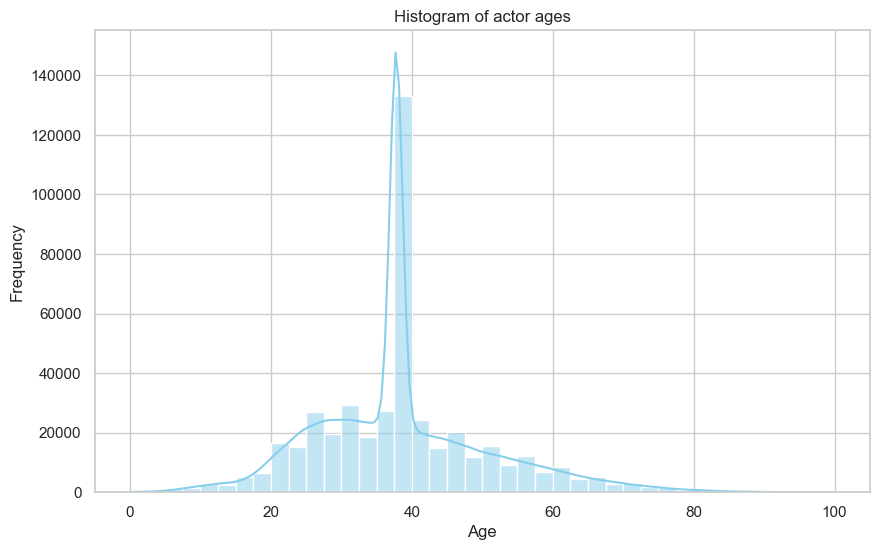

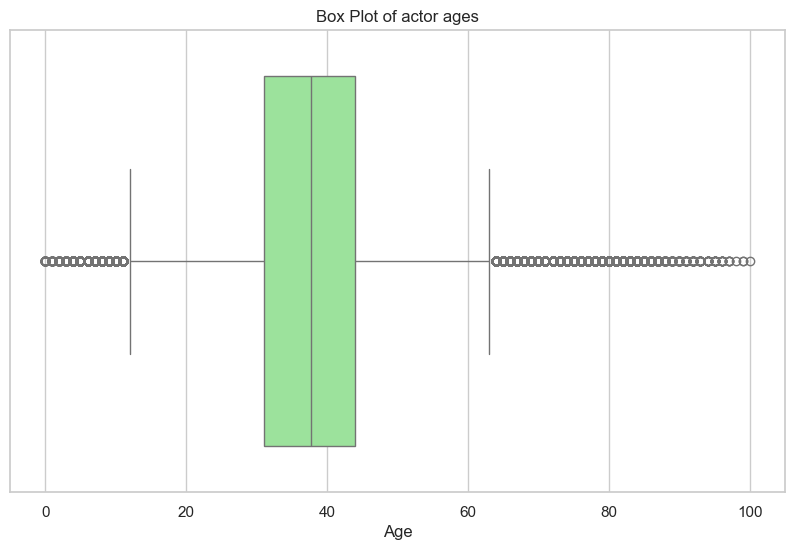

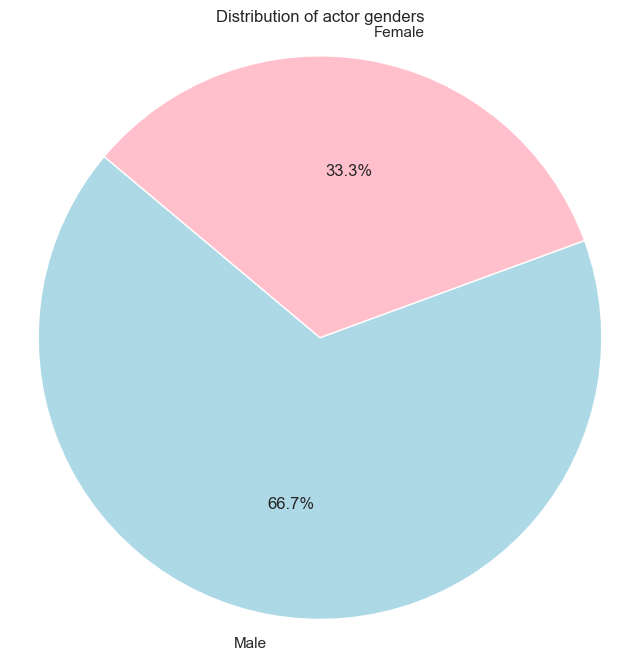

In [50]:
# Set a consistent style for the plots
sns.set_theme(style="whitegrid")

# Histogram for the age of actors
plt.figure(figsize=(10, 6))
sns.histplot(characters['ActorAge'], bins=40, kde=True, color='skyblue')
plt.title("Histogram of actor ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Box Plot for age of actors
plt.figure(figsize=(10, 6))
sns.boxplot(x=characters['ActorAge'], color='lightgreen')
plt.title("Box Plot of actor ages")
plt.xlabel("Age")
plt.show()

# Pie Chart for the gender of actors using the ActorGenderFlag
gender_counts = characters['ActorGenderFlag'].value_counts()
labels = ['Male', 'Female'] 
colors = ['lightblue', 'pink']
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of actor genders")
plt.axis('equal')
plt.show()

The visualizations show what we already saw with describe() earlier. The age is more or less evenly distributed around the mean of 37. The boxplot shows that the middle 50% of the ages are roughly between 15 and 62. 

The gender is not evenly distributed. Around 2/3 of the actors which are included in the data are male. This has to be considered in later analyses especially when looking at impact of emotions in a movie on the gender of selected actors in that movie.

#### Merging the movie and the summary plot datasets

In [14]:
movie_plot = movie.merge(plots, on='WikiID', how='left')
movie_plot.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama],"Eva, an upper class housewife, becomes frustra..."


#### Extracting only release year from release date as there are a lot of entries with just years

In [15]:
movie_plot['merge_year'] = movie_plot['ReleaseDate'].apply(lambda x: x.split('-')[0] if pd.notna(x) else None).astype('Int64')


#### EDA on the merged dataset

<Axes: xlabel='merge_year', ylabel='Count'>

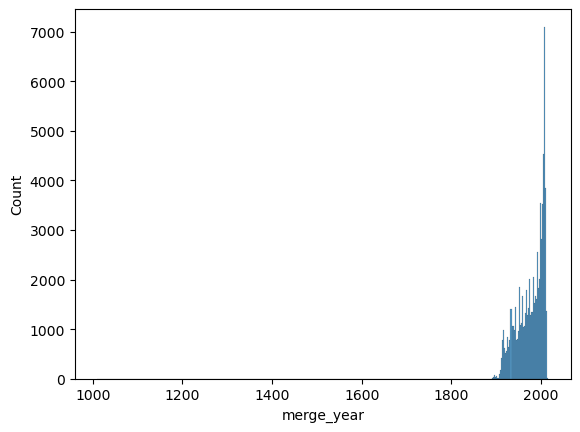

In [16]:
sns.histplot(x='merge_year', data=movie_plot)

#### There seems to be an outlier somewhere...

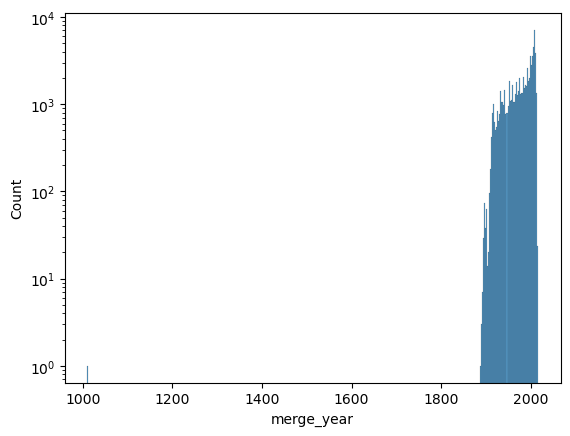

In [17]:
hist = sns.histplot(x='merge_year', data=movie_plot)
hist.set_yscale('log')

In [18]:
movie_plot['merge_year'].min()

1010

#### Movie released in 1010 seems weird...

In [19]:
movie_plot[movie_plot['merge_year'] == 1010]

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...","[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",Veteran homicide cop Ferman and his hot-heade...,1010


#### Hunting Season is a movie released in 2010, so must be a typo!

In [20]:
movie_plot.loc[movie_plot['merge_year'] == 1010, 'merge_year'] = 2010
movie_plot.loc[movie_plot['ReleaseDate'] == '1010-12-02', 'ReleaseDate'] = '2010-12-02'
movie_plot[movie_plot['Name'] == 'Hunting Season']

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year
62836,29666067,/m/0fphzrf,Hunting Season,2010-12-02,12160978.0,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...","[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",Veteran homicide cop Ferman and his hot-heade...,2010


In [21]:
movie_languages_expanded = movie_plot.explode('Languages').reset_index(drop=True).copy()
movie_languages_expanded.shape

(95172, 14)

In [22]:
top_languages = movie_languages_expanded['Languages'].value_counts().nlargest(5).index
movie_languages_expanded['Languages'] = movie_languages_expanded['Languages'].apply(lambda x: x if x in top_languages else 'Other')

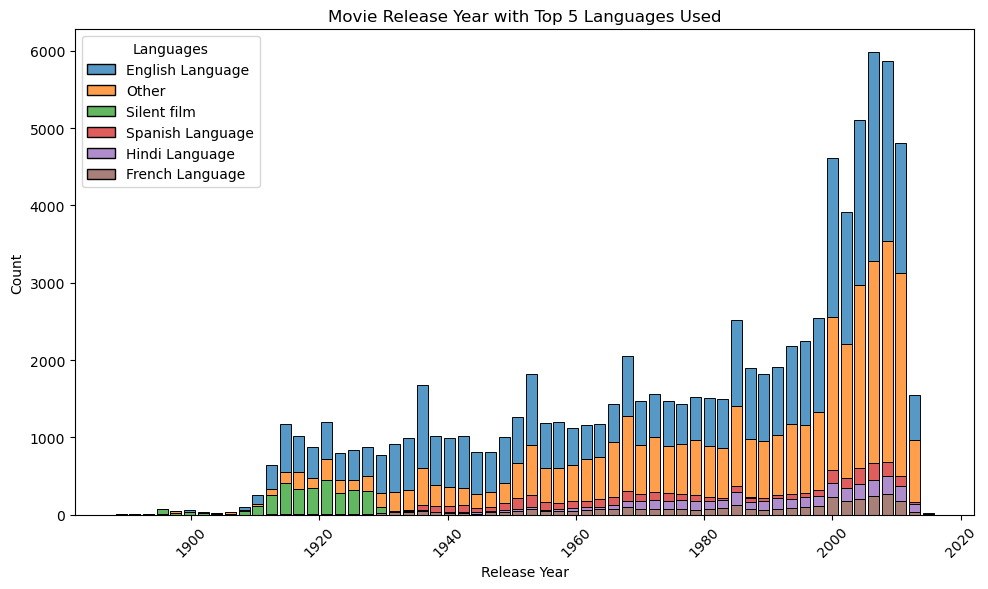

In [23]:
plt.figure(figsize=(10, 6))
# sns.histplot(data=movie_languages_expanded, x='merge_year', hue='Languages', multiple='stack', shrink=0.8, palette="tab10")
sns.histplot(data=movie_languages_expanded, x='merge_year', hue='Languages', multiple='stack', shrink=0.8)

handles, labels = plt.gca().get_legend_handles_labels()

plt.title('Movie Release Year with Top 5 Languages Used')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
movie_genres_expanded = movie_plot.explode('Genres').reset_index(drop=True).copy()
movie_genres_expanded.shape

(245623, 14)

In [25]:
top_genres = movie_genres_expanded['Genres'].value_counts().nlargest(5).index
movie_genres_expanded['Genres'] = movie_genres_expanded['Genres'].apply(lambda x: x if x in top_genres else 'Other')

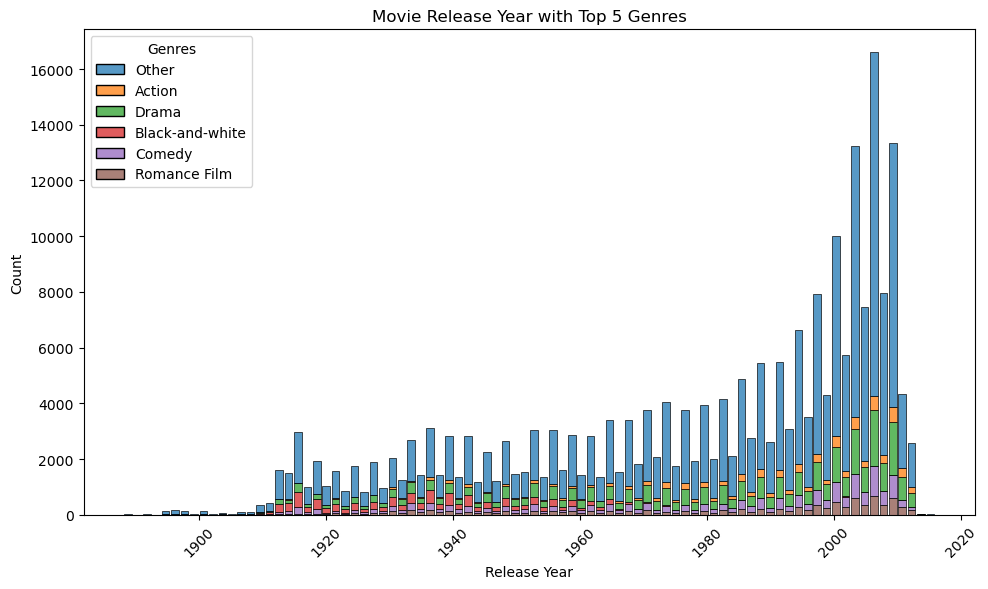

In [26]:
plt.figure(figsize=(10, 6))
# sns.histplot(data=movie_genres_expanded, x='merge_year', hue='Genres', multiple='stack', shrink=0.8, palette="tab10")
sns.histplot(data=movie_genres_expanded, x='merge_year', hue='Genres', multiple='stack', shrink=0.8)

handles, labels = plt.gca().get_legend_handles_labels()

plt.title('Movie Release Year with Top 5 Genres')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()